***Parte de Extraer tablas de PDF***

In [ ]:
#instalamos los codigos en el colab
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.3/249.3 kB 19.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of camelot-py[cv] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

In [ ]:
#actualizar el lector de PyPDF2
!pip install --upgrade PyPDF2==2.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: PyPDF2
    Found existing installation: PyPDF2 3.0.1
    Uninstalling PyPDF2-3.0.1:
      Successfully uninstalled PyPDF2-3.0.1


In [ ]:
# importamos las librerias
import camelot as cm  
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
from PyPDF2 import PdfFileReader
import re 

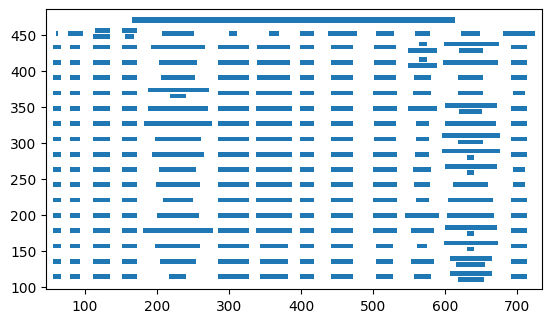

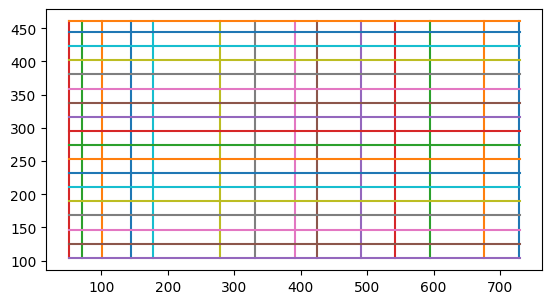

In [ ]:
# subimos el PDF en la carpeta de sample_data y vemos los parametros
tables = cm.read_pdf("/content/sample_data/G5_AYACUCHO.pdf", flavor = "lattice")
cm.plot(tables[0], kind='text').show()
cm.plot(tables[0], kind='line').show()

In [ ]:
# Extraer todas las tablas del PDF
tables = cm.read_pdf("/content/sample_data/G5_AYACUCHO.pdf", flavor="lattice", pages="1-6", table_regions=['80,550,750,50'], strip_text='\n')

# Verificar la cantidad de tablas extraídas
if len(tables) == 6:
    print("Se extrajeron todas las tablas exitosamente.")
else:
    print("No se extrajeron todas las tablas. Alguna tabla pudo no haberse extraído correctamente.")

Se extrajeron todas las tablas exitosamente.


In [ ]:
# Limpiar y combinar los DataFrames de cada tabla
dataframes = []
for table in tables:
    df = table.df
    df.columns = df.iloc[0]
    df = df[1:]
    df['DRE'] = df['DRE'].map(lambda x: re.sub('[DRE]','',str(x)))
    df['UGEL'] = df['UGEL'].str.replace('UGEL', '')
    df['Dirección'] = df['Dirección'].map(lambda x: re.sub('[\(S\/N\)]','',str(x)))
    dataframes.append(df)

<ipython-input-13-0d1429b48178>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRE'] = df['DRE'].map(lambda x: re.sub('[DRE]','',str(x)))
<ipython-input-13-0d1429b48178>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UGEL'] = df['UGEL'].str.replace('UGEL', '')
<ipython-input-13-0d1429b48178>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
jec_data_5 = pd.concat(dataframes, ignore_index=True)
jec_data_5

,Año JEC,Código modular,Código local,Nombre de la IE,DRE,UGEL,Ubigeo,Departamento,Provincia,Distrito,Dirección,Área Geográfica
0,2015,1162122,078409,Humberto Sánchez del PiNO,AYACUCHO,CANGALLO,050203,AYACUCHO,CANGALLO,LOS MOROCHUCOS,AVEIDA LO ETUDIATE MZ B LOTE 1,URBANA
1,2015,0538751,078391,LOS MOROCHUCOS,AYACUCHO,CANGALLO,050203,AYACUCHO,CANGALLO,LOS MOROCHUCOS,JIRO LO ETUDIATE,URBANA
2,2015,0424648,078188,RAMON CASTILLA,AYACUCHO,CANGALLO,050202,AYACUCHO,CANGALLO,CHUSCHI,UYUPAMPA,URBANA
3,2015,0579854,077589,COLEGIO ESTATAL JOSE DE SAN MARTIN,AYACUCHO,HUAMANGA,050114,AYACUCHO,HUAMANGA,VINCHOS,ACCOPAMPA,RURAL
4,2015,0579821,075255,MARISCAL GUILLERMO MILLER,AYACUCHO,HUAMANGA,050103,AYACUCHO,HUAMANGA,ACOS VINCHOS,AVEIDA AQUILE LAAO FLORE,URBANA
...,...,...,...,...,...,...,...,...,...,...,...,...
73,2017,0670885,082227,MARISCAL AGUSTIN GAMARRA,AYACUCHO,LA MAR,050509,AYACUCHO,LA MAR,SAMUGARI,PALMAPAMPA,URBANA
74,2017,1370154,081968,EDUARDO AÑAÑOS PEREZ,AYACUCHO,LA MAR,050501,AYACUCHO,LA MAR,SAN MIGUEL,PLAZA PRICIPAL PATIBAMBA,RURAL
75,2017,1349141,780687,JUAN PABLO II,AYACUCHO,LA MAR,050508,AYACUCHO,LA MAR,TAMBO,PLAZA PRICIPAL,URBANA
76,2017,0362830,566729,NUESTRA SEÑORA PERPETUO SOCORRO,AYACUCHO,LUCANAS,050601,AYACUCHO,LUCANAS,PUQUIO,JIRO 9 DE DICIEMBRE,URBANA


In [ ]:
# Guardar el DataFrame combinado en formato dta
jec_data_5.to_stata("jec_data_5.dta")

<ipython-input-15-06e084286f3e>:2: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Año JEC   ->   A_o_JEC
    Código modular   ->   C_digo_modular
    Código local   ->   C_digo_local
    Nombre de la IE   ->   Nombre_de_la_IE
    Dirección   ->   Direcci_n
    Área Geográfica   ->   _rea_Geogr_fica

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  jec_data_5.to_stata("jec_data_5.dta")


In [ ]:
#descargamos el la base de datos con los 3 puntos al lado derecho de la base, luego descargamos el archivo el script